# Loan Analysis for Financial Advisory Services OAF

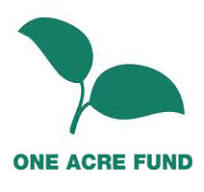

## 1. Introduction

### 1.1. About the data
- The dataset contains information about loans provided by Financial Advisory Services to their clients. 
- One Acre Fund deals with farmers meaning that all clients for the loans products are farmers. 
- The data includes details such as contract reference, loan status, start and end dates, payment information, client demographics, and loan type.

### 1.2. Key Steps of EDA
1. Initial exploration involves loading the data, 
2. Creating new measures/ fields for the data
3. checking for missing values and data types, 
4. summarizing statistics, analyzing unique values in categorical columns, and then,
5. deriving insights and creating visualizations.

### 1.3. Columns of interest
- To understand payment schedule the key columns include "status" for loan repayment status and "next_contract_payment_due_date" 

- For payment progress and checking arrears, the columns of interest are "cumulative_amount_paid" and "expected_cumulative_amount_paid".

- To understand performance of loans, we will use "name" for loan type offering as well as information on payment progress. 

- Lastly, for demographic data, we will deal with "birthdate" and "gender".

## 2. Analysis Code

In [1]:
# loading the crucial libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the dataset

loans = pd.read_csv(r'C:\Users\User\Downloads\analytics_specialist_hiring_dataset_final_(2).csv')
loans.head(2)

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,l3_entity_id,name,expected_payment_progression
0,abc0001,Completed,2022-05-20T08:23:51.406303,2022-05-20T08:23:51.406303,2022-05-20T08:23:51.406303,0.0,0.00,0.00,0.0,1943-01-01,0,5121,Cash Sales IPP,1.000000
1,abc0002,Active,2022-05-25T13:28:49.873746,NaN,2022-08-31T18:34:01.654276,5131.0,6164.16,8171.86,2000.0,1937-01-01,1,5073,Individual loan,0.754315


In [3]:
# info about the dataset
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   contract_reference               1000 non-null   object 
 1   status                           1000 non-null   object 
 2   start_date                       1000 non-null   object 
 3   end_date                         246 non-null    object 
 4   next_contract_payment_due_date   1000 non-null   object 
 5   cumulative_amount_paid           1000 non-null   float64
 6   expected_cumulative_amount_paid  1000 non-null   float64
 7   nominal_contract_value           1000 non-null   float64
 8   deposit_amount                   1000 non-null   float64
 9   birthdate                        858 non-null    object 
 10  gender                           1000 non-null   int64  
 11  l3_entity_id                     1000 non-null   int64  
 12  name                 

In [4]:
# checking the datatypes of the columns of the data

loans.dtypes

contract_reference                  object
status                              object
start_date                          object
end_date                            object
next_contract_payment_due_date      object
cumulative_amount_paid             float64
expected_cumulative_amount_paid    float64
nominal_contract_value             float64
deposit_amount                     float64
birthdate                           object
gender                               int64
l3_entity_id                         int64
name                                object
expected_payment_progression       float64
dtype: object

### 2.1. Deriving PAR Status (Portfolio at risk)
- Convert the datatime column to datatime and then use if function to label the different categories

In [5]:
# converting the date columns to datatime dtype

date_columns = ['start_date', 'end_date', 'next_contract_payment_due_date', 'birthdate']
for col in date_columns:
    loans[col] = pd.to_datetime(loans[col])

In [6]:
# checking if the columns datatypes have changed

date_cols = ['start_date', 'end_date', 'next_contract_payment_due_date', 'birthdate']

loans[date_cols].dtypes

start_date                        datetime64[ns]
end_date                          datetime64[ns]
next_contract_payment_due_date    datetime64[ns]
birthdate                         datetime64[ns]
dtype: object

- with the datatime columns already changed, let us now compute for the days past due of the customer.

In [7]:
# assign a variable called today and then get days past due as the difference between today and next_expected_client_name
# Calculate the days past due for each client

today = pd.to_datetime("today")
loans['days_past_due'] = (today - loans['next_contract_payment_due_date']).dt.days

loans.head(2)

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,l3_entity_id,name,expected_payment_progression,days_past_due
0,abc0001,Completed,2022-05-20 08:23:51.406303,2022-05-20 08:23:51.406303,2022-05-20 08:23:51.406303,0.0,0.00,0.00,0.0,1943-01-01,0,5121,Cash Sales IPP,1.000000,749
1,abc0002,Active,2022-05-25 13:28:49.873746,NaT,2022-08-31 18:34:01.654276,5131.0,6164.16,8171.86,2000.0,1937-01-01,1,5073,Individual loan,0.754315,645


In [8]:
# using a function to assign PAR category for all farmers

# Define function to assign PAR status based on days past due
def assign_par_status(days_past_due):
    if days_past_due < 0:
        return 'OnTime'
    elif days_past_due <= 7:
        return 'PAR0-7'
    elif days_past_due <= 30:
        return 'PAR8-30'
    elif days_past_due <= 90:
        return 'PAR31-90'
    else:
        return 'PAR90+'

# Apply the function to create PAR status column
loans['PAR_status'] = loans['days_past_due'].apply(assign_par_status)

# Drop unnecessary columns
loans.drop(columns=['days_past_due'], inplace=True)

# Display the resulting DataFrame
loans.head(2)

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,l3_entity_id,name,expected_payment_progression,PAR_status
0,abc0001,Completed,2022-05-20 08:23:51.406303,2022-05-20 08:23:51.406303,2022-05-20 08:23:51.406303,0.0,0.00,0.00,0.0,1943-01-01,0,5121,Cash Sales IPP,1.000000,PAR90+
1,abc0002,Active,2022-05-25 13:28:49.873746,NaT,2022-08-31 18:34:01.654276,5131.0,6164.16,8171.86,2000.0,1937-01-01,1,5073,Individual loan,0.754315,PAR90+


### 2.2. Deriving collection rate
- Expected Cumulative Amount Paid - Deposit

In [9]:
# determing collection rate

loans['current_collection_rate'] = loans['expected_cumulative_amount_paid'] - loans['deposit_amount']

loans['current_collection_rate'].head(5)

0       0.00
1    4164.16
2    3273.52
3    3142.35
4    5243.68
Name: current_collection_rate, dtype: float64

### 2.3. Deriving amount in arrears
- Expected amount - Amount paid

In [10]:
# determing the amount in arrears for customers

loans['amount_in_arrears'] = loans['expected_cumulative_amount_paid'] - loans['nominal_contract_value']
loans['amount_in_arrears'].head(5)

0       0.00
1   -2007.70
2   -1578.34
3   -4309.51
4   -2528.18
Name: amount_in_arrears, dtype: float64

### 2.4. Deriving payment progression
- Cumulative amount paid / Nominal contract value

In [11]:
## determining payment progression for each customer

loans['payment_progression'] = loans['cumulative_amount_paid'] / loans['nominal_contract_value']
loans['payment_progression'].head(5)

0         NaN
1    0.627886
2    0.452432
3    0.416194
4    0.335869
Name: payment_progression, dtype: float64

### 2.5. Deriving expected payment progression
- Expected cumulative amount paid / Nominal contract value

In [12]:
## determine expected payment progression for customer

loans['expected_payment_progression'] = loans['expected_cumulative_amount_paid'] / loans['nominal_contract_value']
loans['expected_payment_progression'].head(5)

0         NaN
1    0.754315
2    0.769648
3    0.587680
4    0.753873
Name: expected_payment_progression, dtype: float64

### 2.6. Deriving loan types
- Using the ‘name’ field, create a new field called LoanType.
- Create a function that assign categories to Loan type. 
- Any entry in the Loan type field that contains:
       - ‘Individual’ is Individual Loan,
       - ‘Group’ is Group Loan,
       - ‘Paygo’is  Paygo Loan, and
       - ‘Cash’ is  Cash Sale.

In [13]:
## derive loan types for all loans

# Define a function to derive loan type from the 'name' column
def derive_loan_type(name):
    if 'Individual' in name:
        return 'Individual Loan'
    elif 'Group' in name:
        return 'Group Loan'
    elif 'Paygo' in name:
        return 'Paygo Loan'
    elif 'Cash' in name:
        return 'Cash Sale'
    else:
        return 'Unknown'

# Create a new column 'LoanType' based on 'name' column
loans['LoanType'] = loans['name'].apply(derive_loan_type)

# Display the resulting DataFrame
loans.head(2)

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,l3_entity_id,name,expected_payment_progression,PAR_status,current_collection_rate,amount_in_arrears,payment_progression,LoanType
0,abc0001,Completed,2022-05-20 08:23:51.406303,2022-05-20 08:23:51.406303,2022-05-20 08:23:51.406303,0.0,0.00,0.00,0.0,1943-01-01,0,5121,Cash Sales IPP,NaN,PAR90+,0.00,0.0,NaN,Cash Sale
1,abc0002,Active,2022-05-25 13:28:49.873746,NaT,2022-08-31 18:34:01.654276,5131.0,6164.16,8171.86,2000.0,1937-01-01,1,5073,Individual loan,0.754315,PAR90+,4164.16,-2007.7,0.627886,Individual Loan


## 3. Exploratory Data Analysis

In [14]:
## dealing with null values in all computed columns

computed_columns = ['current_collection_rate','amount_in_arrears', 'payment_progression', 'LoanType']

# print columns with null values
print(loans[computed_columns].isnull().sum())

loans[computed_columns] = loans[computed_columns].fillna(0)

# checking if null values are addressed
print('*'*100)
print(loans[computed_columns].isnull().sum())

current_collection_rate     0
amount_in_arrears           0
payment_progression        84
LoanType                    0
dtype: int64
****************************************************************************************************
current_collection_rate    0
amount_in_arrears          0
payment_progression        0
LoanType                   0
dtype: int64


In [15]:
# Display the first few rows of the dataset

loans.head(10)

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,l3_entity_id,name,expected_payment_progression,PAR_status,current_collection_rate,amount_in_arrears,payment_progression,LoanType
0,abc0001,Completed,2022-05-20 08:23:51.406303,2022-05-20 08:23:51.406303,2022-05-20 08:23:51.406303,0.0,0.00,0.00,0.0,1943-01-01,0,5121,Cash Sales IPP,NaN,PAR90+,0.00,0.00,0.000000,Cash Sale
1,abc0002,Active,2022-05-25 13:28:49.873746,NaT,2022-08-31 18:34:01.654276,5131.0,6164.16,8171.86,2000.0,1937-01-01,1,5073,Individual loan,0.754315,PAR90+,4164.16,-2007.70,0.627886,Individual Loan
2,abc0003,Active,2022-05-31 10:02:23.158972,NaT,2022-07-22 01:17:15.526819,3100.0,5273.52,6851.86,2000.0,1963-11-10,1,5072,Individual loan,0.769648,PAR90+,3273.52,-1578.34,0.452432,Individual Loan
3,abc0004,Active,2022-07-05 11:49:03.801563,NaT,2022-08-18 13:34:13.983433,4350.0,6142.35,10451.86,3000.0,NaT,1,5084,Individual loan,0.587680,PAR90+,3142.35,-4309.51,0.416194,Individual Loan
4,abc0005,Active,2022-05-31 06:31:25.977374,NaT,2022-07-04 13:30:36.436593,3450.0,7743.68,10271.86,2500.0,1998-05-10,1,5074,Individual loan,0.753873,PAR90+,5243.68,-2528.18,0.335869,Individual Loan
5,abc0006,Completed,2022-06-09 06:40:08.391773,2022-06-09 06:40:08.391773,2022-06-09 06:40:08.391773,0.0,0.00,0.00,0.0,1968-12-08,1,5072,Cash Sales,NaN,PAR90+,0.00,0.00,0.000000,Cash Sale
6,abc0007,Active,2022-06-06 08:22:24.559002,NaT,2022-09-18 01:21:55.010290,6700.0,7088.22,10271.86,2500.0,1970-01-01,1,5084,Individual loan,0.690062,PAR90+,4588.22,-3183.64,0.652267,Individual Loan
7,abc0008,Completed,2022-05-28 08:29:58.400869,2022-05-28 08:29:58.400869,2022-05-28 08:29:58.400869,0.0,0.00,0.00,0.0,NaT,0,5084,Cash Sales,NaN,PAR90+,0.00,0.00,0.000000,Cash Sale
8,abc0009,Completed,2022-05-20 07:54:21.755012,2022-05-20 07:54:21.755012,2022-05-20 07:54:21.755012,0.0,0.00,0.00,0.0,1935-01-01,0,5087,Cash Sales,NaN,PAR90+,0.00,0.00,0.000000,Cash Sale
9,abc0010,Active,2022-06-09 12:33:59.617096,NaT,2022-07-05 15:53:50.665023,2464.0,6821.15,10271.86,1848.0,1979-01-01,1,5084,Individual loan,0.664062,PAR90+,4973.15,-3450.71,0.239879,Individual Loan


In [16]:
# # Display the last few rows of the dataset

loans.tail(10)

,contract_reference,status,start_date,end_date,next_contract_payment_due_date,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,birthdate,gender,l3_entity_id,name,expected_payment_progression,PAR_status,current_collection_rate,amount_in_arrears,payment_progression,LoanType
990,abc0991,Active,2022-03-04 08:51:17.570857,NaT,2022-07-07 23:15:15.781941,7516.00,7538.00,7538.00,1356.0,1987-01-01,0,5121,Individual Loan IPP,1.000000,PAR90+,6182.00,0.00,0.997081,Individual Loan
991,abc0992,Completed,2022-03-03 05:10:42.192882,2022-03-03 05:10:42.192882,2022-03-03 05:10:42.192882,0.00,0.00,0.00,0.0,1972-01-18,1,5121,Cash Sales IPP,NaN,PAR90+,0.00,0.00,0.000000,Cash Sale
992,abc0993,Completed,2022-03-11 10:47:00.649729,2022-08-31 15:33:43.170150,2022-10-09 10:39:45.385244,3924.14,3701.89,3924.14,1173.0,1984-04-05,0,5121,Group Loan 7th Mar 2022,0.943363,PAR90+,2528.89,-222.25,1.000000,Group Loan
993,abc0994,Active,2022-03-07 11:10:27.806563,NaT,2022-09-05 04:12:42.240022,15244.00,16948.56,17069.14,5139.0,1954-11-10,0,5121,Group Loan 7th Mar 2022,0.992936,PAR90+,11809.56,-120.58,0.893074,Group Loan
994,abc0995,Active,2022-03-22 10:52:47.372596,NaT,2022-07-17 23:00:13.533565,9638.00,12853.76,13509.14,5398.0,1974-01-01,1,5121,Group Loan 7th Mar 2022,0.951486,PAR90+,7455.76,-655.38,0.713443,Group Loan
995,abc0996,Completed,2022-02-22 10:37:49.307274,2022-02-22 10:37:49.307274,2022-02-22 10:37:49.307274,0.00,0.00,0.00,0.0,1945-01-01,0,5121,Cash Sales IPP,NaN,PAR90+,0.00,0.00,0.000000,Cash Sale
996,abc0997,Active,2022-04-06 12:29:50.136932,NaT,2022-09-19 02:29:46.898713,12066.00,12769.96,14056.31,5566.0,1954-02-10,0,5121,Group Loan 7th Mar 2022,0.908486,PAR90+,7203.96,-1286.35,0.858405,Group Loan
997,abc0998,Active,2022-02-19 06:53:04.854248,NaT,2022-07-21 10:11:22.062259,8714.00,11054.14,11054.14,3314.0,1938-01-01,0,5121,Group Loan 7th Mar 2022,1.000000,PAR90+,7740.14,0.00,0.788302,Group Loan
998,abc0999,Completed,2022-02-11 08:02:07.449586,2022-09-07 16:53:12.320369,2022-09-11 08:00:44.633951,13489.14,13489.14,13489.14,4046.0,1984-05-05,0,5121,Group Loan 7th Mar 2022,1.000000,PAR90+,9443.14,0.00,1.000000,Group Loan
999,abc1000,Completed,2022-02-18 07:21:30.171788,2022-02-18 07:21:30.171788,2022-02-18 07:21:30.171788,0.00,0.00,0.00,0.0,1967-01-01,0,5121,Cash Sales IPP,NaN,PAR90+,0.00,0.00,0.000000,Cash Sale


In [17]:
# determining the number of records and fields in the data

loans.shape

(1000, 19)

In [18]:
# Checking data types

loans.dtypes

contract_reference                         object
status                                     object
start_date                         datetime64[ns]
end_date                           datetime64[ns]
next_contract_payment_due_date     datetime64[ns]
cumulative_amount_paid                    float64
expected_cumulative_amount_paid           float64
nominal_contract_value                    float64
deposit_amount                            float64
birthdate                          datetime64[ns]
gender                                      int64
l3_entity_id                                int64
name                                       object
expected_payment_progression              float64
PAR_status                                 object
current_collection_rate                   float64
amount_in_arrears                         float64
payment_progression                       float64
LoanType                                   object
dtype: object

In [19]:
# Summary statistics

loans.describe()

,cumulative_amount_paid,expected_cumulative_amount_paid,nominal_contract_value,deposit_amount,gender,l3_entity_id,expected_payment_progression,current_collection_rate,amount_in_arrears,payment_progression
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,916.000000,1000.000000,1000.000000,1000.000000
mean,6400.140290,8275.865090,9459.535900,2637.467100,0.630000,5113.506000,0.848446,5638.397990,-1183.670810,0.606453
std,4970.486189,5631.984333,5814.130836,1932.014412,0.483046,15.894609,0.196281,4114.969477,1800.955059,0.312263
min,0.000000,0.000000,0.000000,0.000000,0.000000,5072.000000,0.000000,-4081.000000,-23589.140000,0.000000
25%,2500.000000,3831.800000,5110.765000,1271.000000,0.000000,5121.000000,0.761294,2416.460000,-1919.570000,0.377406
50%,5500.000000,7144.780000,8171.860000,2157.000000,1.000000,5121.000000,0.946997,5097.535000,-143.260000,0.609938
75%,9562.500000,12807.737500,13465.640000,4000.000000,1.000000,5121.000000,1.000000,8969.750000,0.000000,0.907078
max,23982.870000,23854.140000,24009.140000,9598.000000,1.000000,5121.000000,1.000000,17271.940000,0.000000,1.000000


In [20]:
# Determining unique values in categorical columns
print('Loan status:','\n')
print(loans['status'].unique())
print('*'*30)
print('Client gender:','\n')
print(loans['gender'].unique())
print('*'*30)
print('Loan type:','\n')
print(loans['LoanType'].unique())
print('*'*30)

Loan status: 

['Completed' 'Active' 'Defaulted']
******************************
Client gender: 

[0 1]
******************************
Loan type: 

['Cash Sale' 'Individual Loan' 'Group Loan' 'Unknown']
******************************


- We add name labels to the gender field using 0 for male and 1 for female
- We assume this is the convention used in the categories

In [21]:
loans['gender'] = loans['gender'].replace({0:'Male',1:'Female'})

loans['gender'].head(5)

0      Male
1    Female
2    Female
3    Female
4    Female
Name: gender, dtype: object

## 4. Insights and Visualization
- The dataset contains information about loans provided by One Acre Fund.
Most loans are active, with a few completed contracts.
There are missing values in the "end_date" column, indicating ongoing contracts.
The majority of clients are male.
Loan types include Individual Loan and Cash Sale.
The expected payment progression ranges from 0 to 1.

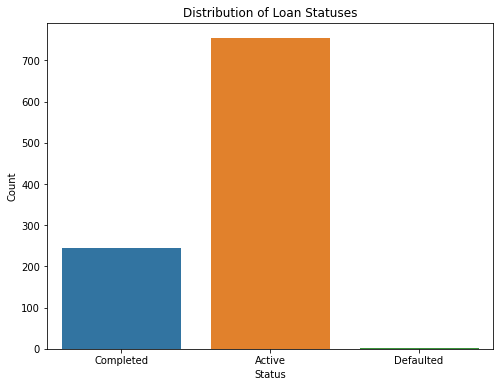

In [22]:
# Visualization 1: Distribution of loan statuses
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=loans)
plt.title('Distribution of Loan Statuses')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

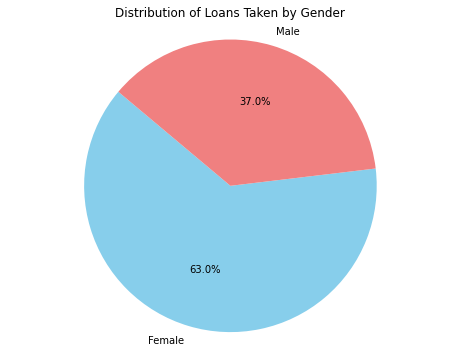

In [23]:
# Group the data by gender and calculate the count of loans for each gender
gender_counts = loans['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Loans Taken by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

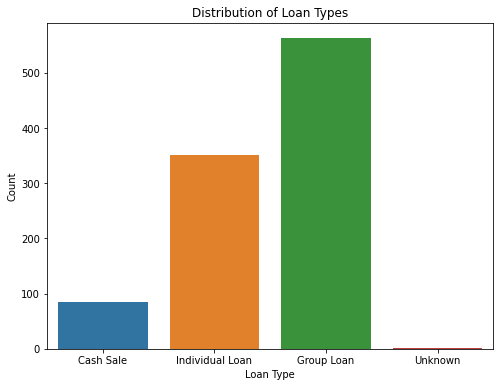

In [24]:
# Visualization 2: Distribution of loan types
plt.figure(figsize=(8, 6))
sns.countplot(x='LoanType', data=loans)
plt.title('Distribution of Loan Types')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.show()

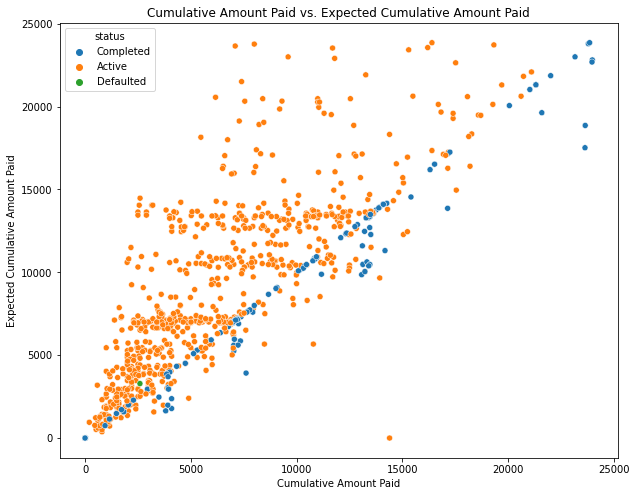

In [25]:
# Visualization 3: Scatter plot of cumulative amount paid vs. expected cumulative amount paid
plt.figure(figsize=(10, 8))
sns.scatterplot(x='cumulative_amount_paid', y='expected_cumulative_amount_paid', hue='status', data=loans)
plt.title('Cumulative Amount Paid vs. Expected Cumulative Amount Paid')
plt.xlabel('Cumulative Amount Paid')
plt.ylabel('Expected Cumulative Amount Paid')
plt.show()

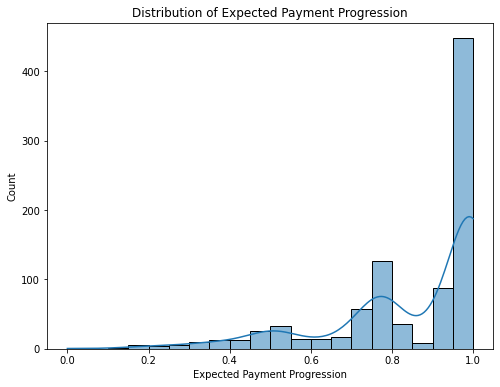

In [26]:
# Visualization 4: Histogram of expected payment progression
plt.figure(figsize=(8, 6))
sns.histplot(loans['expected_payment_progression'], bins=20, kde=True)
plt.title('Distribution of Expected Payment Progression')
plt.xlabel('Expected Payment Progression')
plt.ylabel('Count')
plt.show()

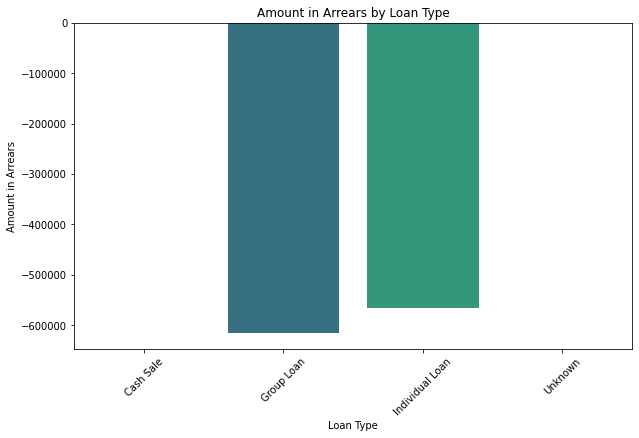

In [27]:
# Group the data by LoanType and calculate the sum of amount_in_arrears for each loan type

loan_type_arrears = loans.groupby('LoanType')['amount_in_arrears'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='LoanType', y='amount_in_arrears', data=loan_type_arrears, palette='viridis')
plt.title('Amount in Arrears by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Amount in Arrears')
plt.xticks(rotation=45)
plt.show()


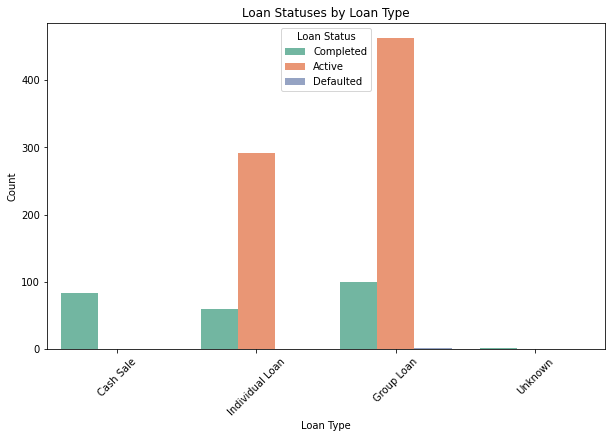

In [28]:
# Plot the count of loan statuses for each loan type
plt.figure(figsize=(10, 6))
sns.countplot(x='LoanType', hue='status', data=loans, palette='Set2')
plt.title('Loan Statuses by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

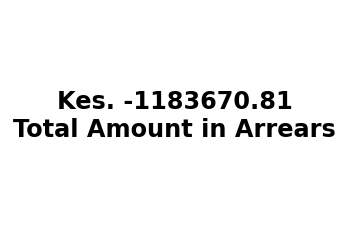

In [29]:
# Assuming 'total_amount_in_arrears' contains the total amount in arrears
total_amount_in_arrears = loans['amount_in_arrears'].sum()

# Create the card visualization
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f"Kes. {total_amount_in_arrears:.2f}\nTotal Amount in Arrears", 
         fontsize=24, weight='bold', ha='center', va='center')
plt.axis('off')  # Turn off the axis
plt.show()

## 5. Conclusions and Recommendations

### 5.1. Conclusions
-  loans in the dataset are active meaning that people are continually paying them. There are more than 200 that have been completed and luckily, there are no loans that have been defaulted.
- The majority of clients taking loans at One Acre Fund are females compared to males, at the ratio of 2:1. This is true since most farmers especially in the rural areas are usually mothers and wives.
- There are more loans of group type takenby the farmers compared to individual loans. This could be an indication of either One Acre Fund majorly prioritizes groups for the loans or else the capacity to pay the loans is easier as a group than when solo for the farmers. 
- Expected payment progression varies between 0 and 1, with majority of the loans having a 1.

### 5.2. Recommendations
- Monitor active loans closely for timely repayments.
- Consider diversifying loan offerings to cater to diverse client needs.
- Implement strategies to improve repayment rates and manage defaults.
- Conduct further analysis to understand factors influencing payment progression.

### 5.3. Limitations
- There are missing values in the 'end_date' column which may skew the analysis of loan status.
- There is limited information provided about clients' demographics and loan details, hence may not provide valid analysis.
- Our Analysis does not consider external factors influencing loan repayment.
- The dataset may not represent the entire population farmers serviced by OAF for loan facilities.
- We have assumed that in gender column, 0 represent male and 1 represent females.

In [31]:
# saving created dataframe as excel file

loans.to_excel('FA Loans.xlsx', index=False)

'****************************************************************************************************'
- Prepared: Tuesday 16th April, 2024
- Signed: Vincent Muiruri